## workflow of tensors 

In [1]:
import torch 
from torch import nn # nn contains the all of the pytorch's building blocks for the neural networks 
import matplotlib.pyplot as plt 

torch.__version__

'2.1.1+cpu'

In [2]:
#creating known parameters 
weight = 0.7 
bias = 0.3

start = 0 
end = 1 
step = 0.02 

X = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight*X + bias
X , y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [3]:
len(X) , len(y)

(50, 50)

### splitting the data into test and train to train our model and test it 

In [4]:
# using the ratio of 80-20 % 
train_split = int(0.8* len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

In [5]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [85]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(x=train_data, y=train_labels, c="b", label="TRAINING DATA")
    plt.scatter(x=test_data, y=test_labels, c="r", label="TEST DATA")
    if predictions is not None:
        plt.scatter(x=test_data, y=predictions, c="g", label="PREDICTIONS")  # Corrected x to be test_data
    plt.legend()
    plt.title("SCATTER PLOT OF TRAIN, TEST AND PREDICTED DATA")
    plt.show()


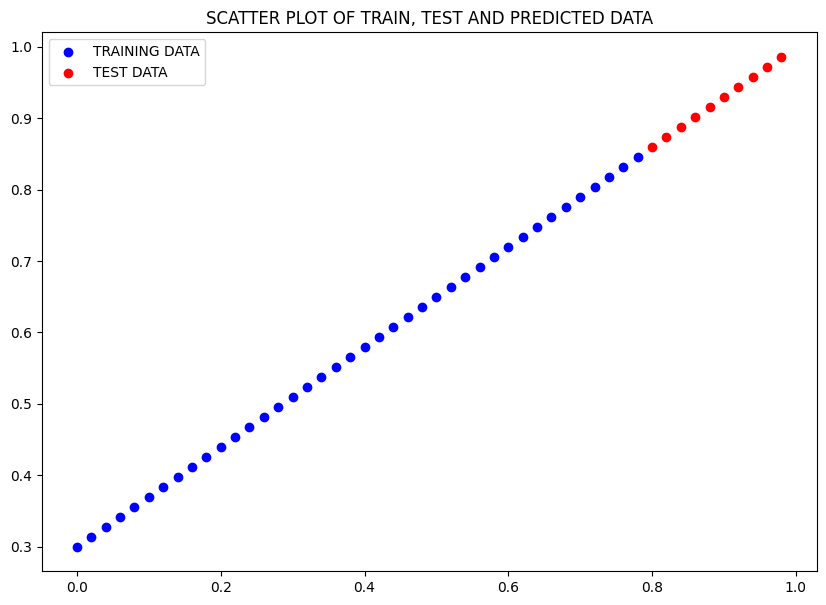

In [86]:
plot_predictions()

## MAKING FIRST LINEAR MODEL USING PYTORCH 

what will our model do :
1. start with random values (for weights and bias )
2. adjust those random values of the weights and bias by looking at the training data to get much more closer to the ideal values 

** HOW DOES IT DO IT ?**
1. through gradient descent 
2. back propogation 


In [87]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):  # almost everything in pytorch inherits from the nn.Module class, also the base class for all the modules
    def __init__(self):
        super().__init__()  # Corrected the super call
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # Corrected indentation
        return self.weights * x + self.bias
    # forward method should always be there in the nn.Module, it defines the computation to be performed at each call


## PYTORCH MODEL BUILDING ESSENTIALS 
* torch.nn - contains all the buildings for the computational graphs ( a neural network )
* torch.nn.parameter - what parameter our model should try and learn 
* torch.nn.Module - its a base class for all the neural network modules , if you subclass it , you should also include forward method in it 
* torch.optim - this where the optimizers in ptorch live , and they will help with gradient descent 
* def forward() - all nn.Module subclasses require you to override the forward() method , this method defines what happens in the forward computations 


In [88]:
#create a manual random seed 


In [89]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.2997], requires_grad=True)]

In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.2997]))])

In [91]:
weight, bias

(0.7, 0.3)

### making predictions using `torch.inference_mode()`  
to check our models predictive power , lets see how well it predicts our y test on the basis of x test 
when we pass the data through our model , its going to run it through the `forward` method 

In [92]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8589],
        [0.8729],
        [0.8868],
        [0.9008],
        [0.9148],
        [0.9288],
        [0.9428],
        [0.9567],
        [0.9707],
        [0.9847]])

In [93]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

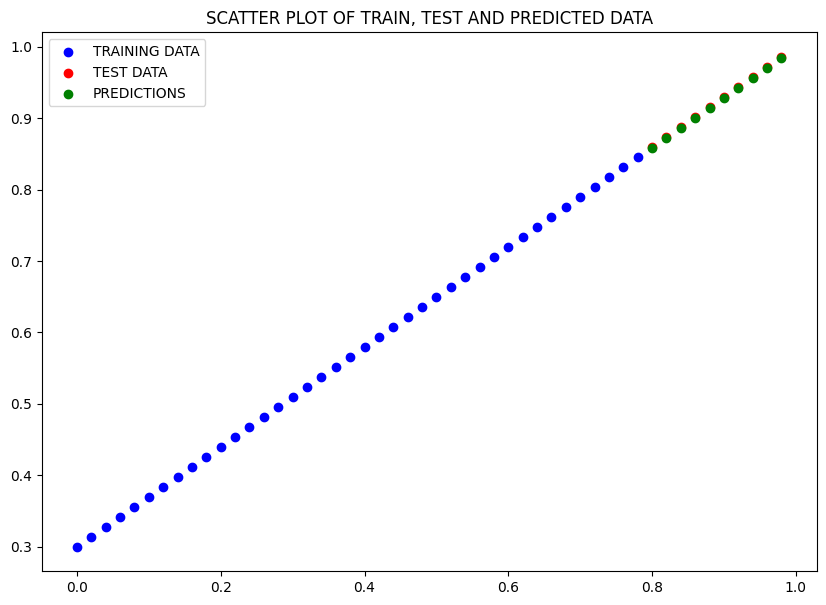

In [94]:
plot_predictions(predictions=y_preds)

In [95]:
# we can also do something similar to the above thing with torch.no_grad() , however , torch.inference_mdoe() is usually more preferred 
with torch.no_grad():
    y_pred_no_grad = model_0(X_test)

y_pred_no_grad

tensor([[0.8589],
        [0.8729],
        [0.8868],
        [0.9008],
        [0.9148],
        [0.9288],
        [0.9428],
        [0.9567],
        [0.9707],
        [0.9847]])

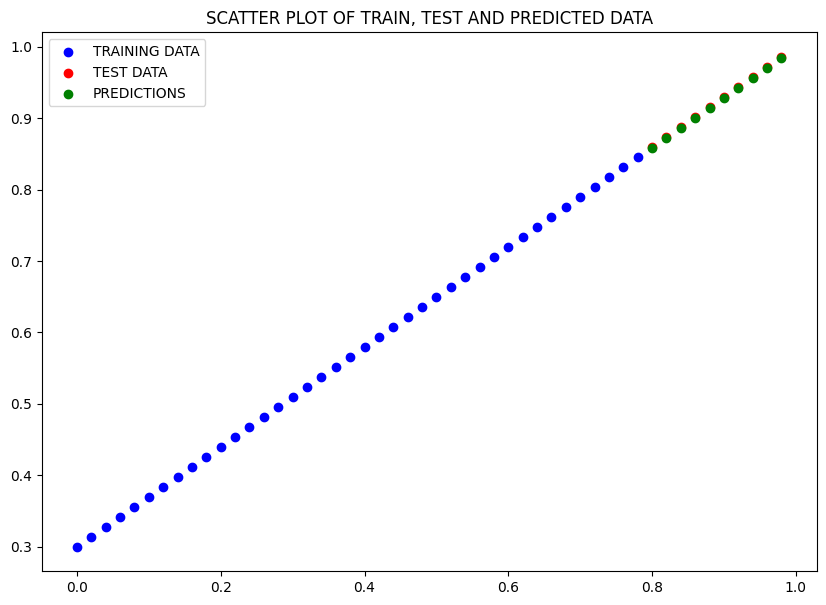

In [96]:
plot_predictions(predictions=y_pred_no_grad)

## training our model 
the whole idea of training is to move our parameters from some `unknown` parameters to some `known` parameters 

 *note* , the loss function can also be called as the cost function in some area or criterions 
 things we need in our model 
 * *LOSS FUNCTION* : a function to measure how bad our model's predictions are as compared to the test dataset 
 * *OPTIMISER* : takes into account the loss of the model and adjusts the model parameters 

and specifically , for pytorch we need a training loop and a testing loop 

In [97]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.2997]))])

In [98]:
# setup a loss function 
loss_fn = nn.L1Loss()
learn_rate = 0.01
# setup an optimiser 
optimiser = torch.optim.SGD(params=model_0.parameters() , lr=learn_rate)  # stochiastic gradient descent 


### BUILDING A TRAINING LOOP IN PYTHON 
things we need in a training loop :
1. loop through the data
2. forward pass (this involves moving data through the forward method) - also called a forward propogation 
3. calculate the loss , and compare the forward pass predictions to ground truth labels 
4. optimisers zeor grad
5. loss backwards (*BACK PROPOGATION*)
6. optimiser step - use the optimiser to adjust the parameters to try and minimise our loss (*GRAIDENT DESCENT*)

In [99]:
epochs = 10
for epoch in range(epochs):
    model_0.train()  # Set model to training mode

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimiser.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimizer step
    optimiser.step()

    # Print loss every 1000 epochs
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}")

Epoch [1/10], Loss: 0.0007196307415142655
Epoch [2/10], Loss: 0.010801342315971851
Epoch [3/10], Loss: 0.0007196307415142655
Epoch [4/10], Loss: 0.010801342315971851
Epoch [5/10], Loss: 0.0007196307415142655
Epoch [6/10], Loss: 0.010801342315971851
Epoch [7/10], Loss: 0.0007196307415142655
Epoch [8/10], Loss: 0.010801342315971851
Epoch [9/10], Loss: 0.0007196307415142655
Epoch [10/10], Loss: 0.010801342315971851


In [100]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.2997]))])

In [101]:
weight , bias

(0.7, 0.3)

In [102]:
preds = model_0(X_test)

In [103]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [104]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8589],
        [0.8729],
        [0.8868],
        [0.9008],
        [0.9148],
        [0.9288],
        [0.9428],
        [0.9567],
        [0.9707],
        [0.9847]])

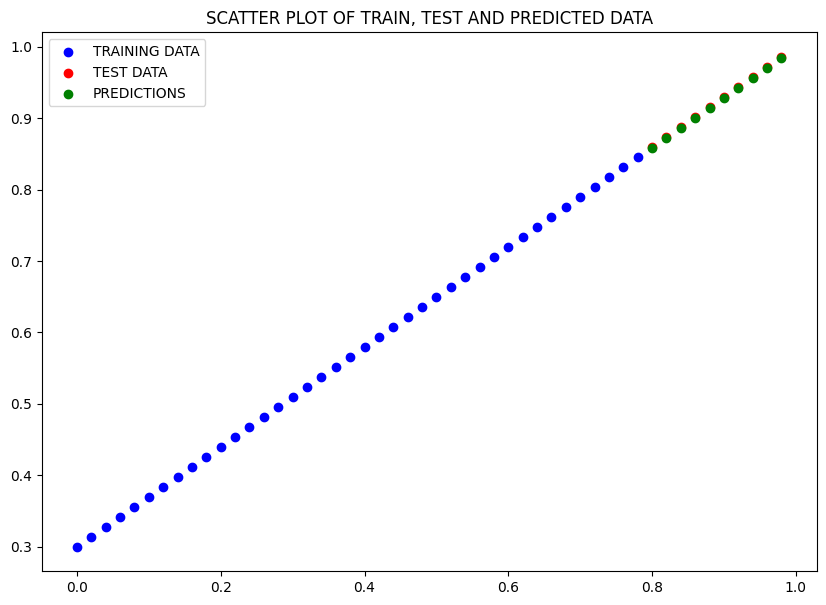

In [105]:
plot_predictions(predictions=y_preds)

[Parameter containing:
tensor([1.1103], requires_grad=True), Parameter containing:
tensor([-1.6898], requires_grad=True)]
OrderedDict([('weights', tensor([1.1103])), ('bias', tensor([-1.6898]))])


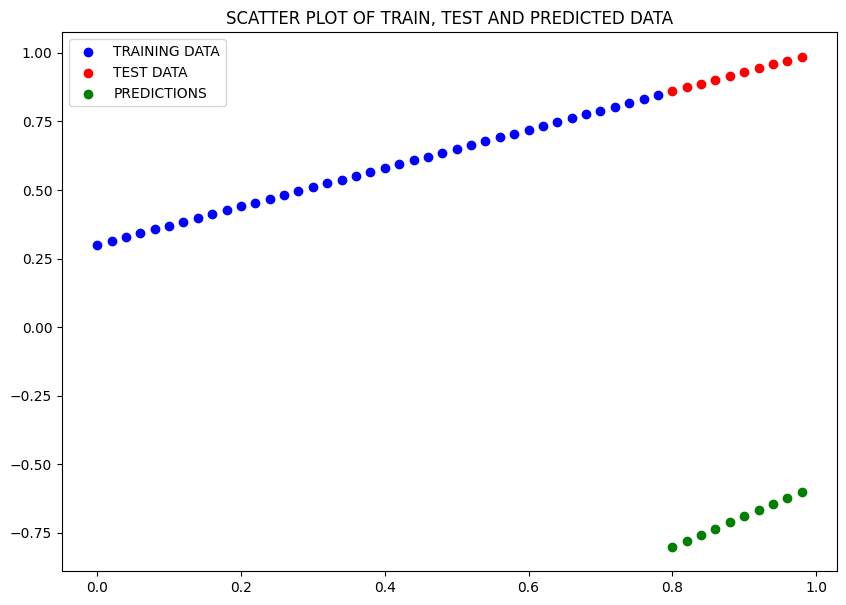

In [115]:
model_0 = LinearRegressionModel()

# Check model parameters
print(list(model_0.parameters()))
print(model_0.state_dict())

# Predict with torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)


In [172]:
# Setup a loss function and optimizer
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()
learning_rate = 0.001  # Reduced learning rate
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=learning_rate)
epoch_count = []
loss_values=[]
test_loss_value = []

# Training loop
epochs = 10000 # Increased number of epochs
for epoch in range(epochs):
    model_0.train()  # Set model to training mode

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    #6. model evaluation 
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred , y_test)
    # Print loss every 100 epochs
    if (epoch + 1) % 500 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_value.append(test_loss)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()} , STATE DICTS : {model_0.state_dict()}")


Epoch [500/10000], Loss: 0.12788572907447815 , STATE DICTS : OrderedDict([('weights', tensor([0.0610])), ('bias', tensor([0.5565]))])
Epoch [1000/10000], Loss: 0.11045467853546143 , STATE DICTS : OrderedDict([('weights', tensor([0.1506])), ('bias', tensor([0.5307]))])
Epoch [1500/10000], Loss: 0.09328273683786392 , STATE DICTS : OrderedDict([('weights', tensor([0.2361])), ('bias', tensor([0.4948]))])
Epoch [2000/10000], Loss: 0.07611140608787537 , STATE DICTS : OrderedDict([('weights', tensor([0.3215])), ('bias', tensor([0.4590]))])
Epoch [2500/10000], Loss: 0.05893930792808533 , STATE DICTS : OrderedDict([('weights', tensor([0.4069])), ('bias', tensor([0.4231]))])
Epoch [3000/10000], Loss: 0.04176793247461319 , STATE DICTS : OrderedDict([('weights', tensor([0.4924])), ('bias', tensor([0.3872]))])
Epoch [3500/10000], Loss: 0.02459549717605114 , STATE DICTS : OrderedDict([('weights', tensor([0.5778])), ('bias', tensor([0.3513]))])
Epoch [4000/10000], Loss: 0.007422624621540308 , STATE D

In [173]:
print(test_loss_value)

[tensor(0.3123), tensor(0.2582), tensor(0.2181), tensor(0.1779), tensor(0.1377), tensor(0.0976), tensor(0.0574), tensor(0.0172), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008)]


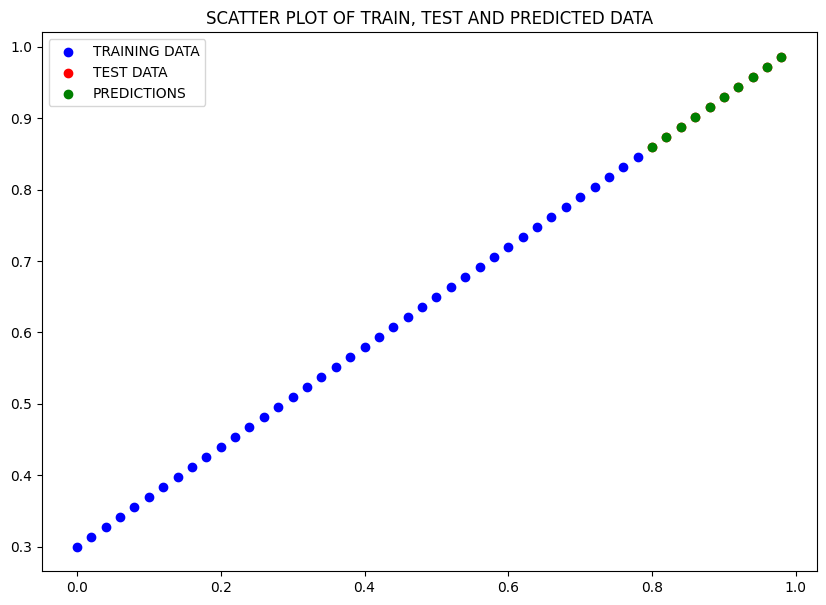

In [174]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [175]:
print(model_0.state_dict())
print(f"True weight: {weight}, True bias: {bias}")

OrderedDict([('weights', tensor([0.6993])), ('bias', tensor([0.2999]))])
True weight: 0.7, True bias: 0.3


In [176]:
print(loss)

tensor(0.0007, grad_fn=<MeanBackward0>)


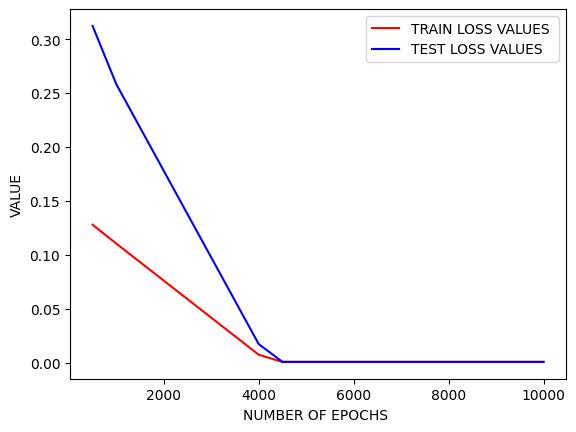

In [177]:
import numpy as np
with torch.no_grad():
    plt.plot(epoch_count , (loss_values) , label = "TRAIN LOSS VALUES " , c = "r")
    plt.plot(epoch_count , test_loss_value , label="TEST LOSS VALUES " , c="b")
    plt.legend()
    plt.xlabel("NUMBER OF EPOCHS ")
    plt.ylabel("VALUE")
    plt.show()

## SAVING A MODEL 
there are three main methods to save and load the model 
1. `torch.save()` - allows you to save a pytorch object in pickle format 
2. `torch.load()` - allows you to load a pytorch saved object 
3. `torch.nn.Module.load_state_dict()` - this allows you to load a models saved state dictionary 

In [178]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6993])), ('bias', tensor([0.2999]))])

In [180]:
torch.save(model_0  , 'model_0.pkl')